# Interspeech


In [1]:
import matplotlib.pyplot

In [2]:
import numpy as np
import pandas as pd

import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from sklearn.model_selection import train_test_split
import random

import keras
from keras import backend as K
from keras import layers

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.convolutional import Convolution2D

from keras.layers.core import Dense, Permute, Reshape
from keras.layers.normalization import BatchNormalization
from keras.layers.wrappers import Bidirectional
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.regularizers import l2

import tensorflow as tf

Using TensorFlow backend.


In [3]:
global X, T
X=[]
T=[]

In [4]:
def loaddata(filename,num):
    f=sio.loadmat(filename)
    data=f['cep']
    data=np.asarray(data)
    mean=np.mean(data,axis=0)
    std=np.std(data,axis=0)
    data=(data-mean)/std
    data=np.asarray(np.vsplit(data[0:int(data.shape[0]/data.shape[1])*data.shape[1]],int(data.shape[0]/data.shape[1])))
    for i in range (data.shape[0]):
        X.append(data[i])
        T.append(num)
    return X, T

In [5]:
X,T = loaddata('assamese.mat',0)
len(X), len(T)

(5704, 5704)

In [6]:
X,T = loaddata('bengali.mat',1)
len(X), len(T)

(8880, 8880)

In [7]:
X,T = loaddata('kannada.mat',2)
len(X),len(T)

(15135, 15135)

In [8]:
X,T = loaddata('malayalam.mat',3)
len(X),len(T)

(18272, 18272)

In [9]:
X,T = loaddata('punjabi.mat',4)
len(X),len(T)

(21083, 21083)

In [10]:
X,T = loaddata('rajasthani.mat',5)
len(X),len(T)

(24092, 24092)

In [11]:
X,T = loaddata('tamil.mat',6)
len(X),len(T)

(27027, 27027)

In [12]:
X,T = loaddata('telugu.mat',7)
len(X),len(T)

(29906, 29906)

In [13]:
X,T = loaddata('hindi.mat',8)
len(X),len(T)

(39070, 39070)

In [14]:
X,T = loaddata('gujrati.mat',9)
len(X),len(T)

(42544, 42544)

## Split Dataset

In [15]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(np.array(X),np.array(T), train_size=0.8, random_state=30)
np.array(Xtrain).shape, np.array(Xtest).shape

c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((34035, 39, 39), (8509, 39, 39))

## Convert 2D dataset to a 1D vector

In [16]:
batchSize=128
num_classes=10
epochs=10
imageRows, imageCols =39,39

In [17]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], imageRows, imageCols, 1)
Xtest = Xtest.reshape(Xtest.shape[0], imageRows,imageCols, 1)
input_shape = (imageRows, imageCols, 1)
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [18]:
input_shape

(39, 39, 1)

In [19]:
Ytrain = keras.utils.to_categorical(Ytrain, num_classes)
Ytest = keras.utils.to_categorical(Ytest, num_classes)

## Define CNN Model

In [20]:
weight_decay = 0.001

model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu", input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(256, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(512, kernel_size=(3,3), W_regularizer=l2(weight_decay), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # (bs, y, x, c) --> (bs, x, y, c)
model.add(Permute((2, 1, 3)))

    # (bs, x, y, c) --> (bs, x, y * c)
bs, x, y, c = model.layers[-1].output_shape
model.add(Reshape((x, y*c)))

model.add(Bidirectional(LSTM(256, return_sequences=False), merge_mode="concat"))
model.add(Dense(num_classes, activation="softmax"))


c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(39, 39, 1..., kernel_regularizer=<keras.reg...)`
  """
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(3, 3), padding="same", activation="relu", kernel_regularizer=<keras.reg...)`
  del sys.path[0]
c:\users\shash\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_si

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 39, 39, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 39, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       73856     
_________________________________________________________________
batch_normalization_2 (Batch (None, 19, 19, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         295168    
__________

## Model Train

In [22]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [23]:
speechTrainData=model.fit(Xtrain, Ytrain,batch_size=batchSize,epochs=epochs,verbose=1,validation_data=(Xtest, Ytest))

Train on 34035 samples, validate on 8509 samples
Epoch 1/10
34035/34035 [==============================] - 36s 1ms/step - loss: 2.8583 - acc: 0.5193 - val_loss: 2.2968 - val_acc: 0.6037
Epoch 2/10
34035/34035 [==============================] - 31s 917us/step - loss: 1.6829 - acc: 0.7359 - val_loss: 1.8000 - val_acc: 0.6460
Epoch 3/10
34035/34035 [==============================] - 31s 910us/step - loss: 1.2606 - acc: 0.7987 - val_loss: 1.6073 - val_acc: 0.6606
Epoch 4/10
34035/34035 [==============================] - 31s 908us/step - loss: 1.0654 - acc: 0.8367 - val_loss: 1.4363 - val_acc: 0.7162
Epoch 5/10
34035/34035 [==============================] - 31s 910us/step - loss: 0.9736 - acc: 0.8594 - val_loss: 2.6366 - val_acc: 0.4768
Epoch 6/10
34035/34035 [==============================] - 31s 922us/step - loss: 0.9164 - acc: 0.8766 - val_loss: 1.2952 - val_acc: 0.7675
Epoch 7/10
34035/34035 [==============================] - 31s 896us/step - loss: 0.8818 - acc: 0.8929 - val_loss: 1.356

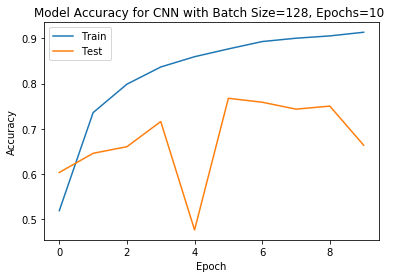

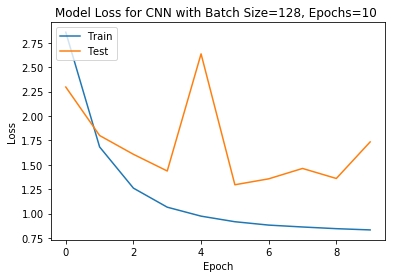

In [24]:
plt.plot(speechTrainData.history['acc'])
plt.plot(speechTrainData.history['val_acc'])
plt.title('Model Accuracy for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot Model  Loss
plt.plot(speechTrainData.history['loss'])
plt.plot(speechTrainData.history['val_loss'])
plt.title('Model Loss for CNN with Batch Size={}, Epochs={} '.format(batchSize,epochs))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
def ConfusionMatrix(actual,predicts,numberClasses,classname):
    nc=numberClasses
    confmat=np.zeros([nc,nc])
    I = pd.Index(classname, name="rows")
    C = pd.Index(classname, name="columns")
    for ri in range (nc):
        value=[]
        trueIndex=np.where(actual[:,ri]==1)
        for j in range (len(trueIndex[0])):
            value.append(predict[trueIndex[0][j]])
        for rj in range (nc):
            confmat[ri][rj]=100*np.mean(value,axis=0)[rj]
    df = pd.DataFrame(data=confmat, index=I, columns=C)
    print(df)
    return

In [26]:
predict=model.predict(Xtrain)
print('Confusion Matrix for Train Data')
ConfusionMatrix(Ytrain,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu', 'Hindi', 'Gujrati'])

Confusion Matrix for Train Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    72.356534   1.302754   4.003939   1.765203   0.131822    7.277846   
Bengali      0.038418  78.921348   0.715053   0.613214   0.014015    9.054489   
Kannada      0.367676   0.585670  86.989671   0.368369   0.018411    7.652464   
Malayalam    0.475241  27.984241   9.055726  25.350016   0.078544   13.956547   
Punjabi      2.301879   0.135401   4.660654   0.405235  55.322653    2.876245   
Rajasthani   0.006048   0.028351   0.712181   0.015659   0.003201   98.417419   
Tamil        0.055559   1.244686   1.184495   0.218141   0.037931    5.523558   
Telugu       0.456847   0.858699   3.512788   0.727967   0.047326   21.566349   
Hindi        0.158768   2.412411   2.439457   0.495830   0.121829   31.650007   
Gujrati      0.012531   0.212542   1.603527   0.102238   0.023390    5.332555

In [27]:
predict=model.predict(Xtest)
print('Confusion Matrix for Test Data')
ConfusionMatrix(Ytest,predict,num_classes,['Assamese','Bengali','Kannada','Malayalam','Punjabi','Rajasthani','Tamil','Telugu', 'Hindi', 'Gujrati'])

Confusion Matrix for Test Data
columns      Assamese    Bengali    Kannada  Malayalam    Punjabi  Rajasthani  \
rows                                                                            
Assamese    67.349464   1.591512   5.653207   1.847336   0.166521    8.752953   
Bengali      0.043652  66.224730   1.211157   0.810299   0.016913   14.532754   
Kannada      0.788243   0.690778  82.198739   0.480509   0.026322    9.957367   
Malayalam    0.582047  26.213247  12.203107  17.259954   0.080897   15.326078   
Punjabi      1.769548   0.096582   6.812716   0.472372  53.545141    3.673733   
Rajasthani   0.007028   0.078083   0.878351   0.023051   0.006554   96.872509   
Tamil        0.059193   2.452948   2.301735   0.344612   0.045563    9.751457   
Telugu       1.265520   1.773274   8.047459   0.974134   0.082096   23.196675   
Hindi        0.166749   3.386220   3.290198   0.616011   0.132675   33.866882   
Gujrati      0.025599   0.501314   3.041387   0.340328   0.043600    7.325188 